In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import pickle

In [3]:
data_file = r'C:\Users\Barbara\Documents\Radboud uni\Internship\2p_data\Fiano\20230309\neural_data.pickle'
filehandler = open(data_file, 'rb')
neural_data = pickle.load(filehandler)
filehandler.close()

In [4]:
neural_data.keys()

dict_keys(['traces', 'footprints', 'df_f', 'deconvolved', 'positions', 'contour'])

In [5]:
tr = neural_data['traces']
spikes = neural_data['deconvolved']
positions = neural_data['positions']

In [6]:
positions.shape

(288, 2)

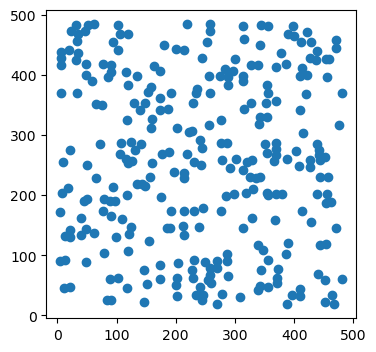

In [7]:
plt.figure(figsize=(4,4))
plt.scatter(positions[:,1],positions[:,0])

### DBSCAN clustering

In [11]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.01, min_samples=10).fit(positions)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 0
Estimated number of noise points: 288


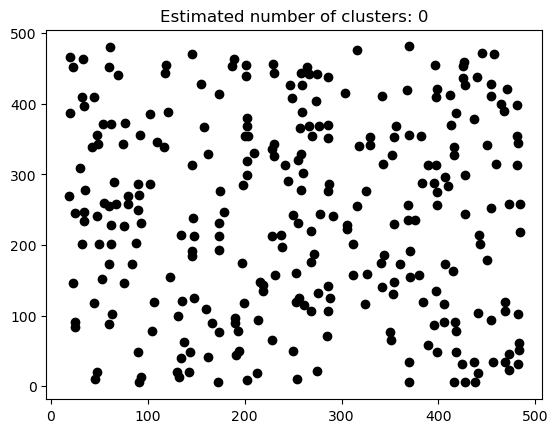

In [14]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = positions[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = positions[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()
